# Lab 6: Heat flow, continued
---

## Submission

Please upload your completed notebook (renamed with your name) to Canvas as usual.

## 2: Application — The Effect of Glacial Periods on the Geothermal Gradient
    
Using what you learned in the last lab, determine the effect of a glacial epoch on the near-surface geothermal gradient. At the start of the glacial epoch $t=-\tau$, where $\tau$ is the duration the ice sheet is present; the ice sheet disappears at $t=0$. For $t<-\tau$, the subsurface temperature is $T_0+\beta x$, where $x=0$ is the surface and $x$ increases downward. $\beta$ is the geothermal gradient. During the period of glaciation ($-\tau \leq t<0$), the surface temperature drops to $T_0-\Delta T_0$. At the end of the glacial period, at $t=0$, the surface temperature rises to $T_0$ again.

Find the subsurface temperature $T(x,t)$ for $t \geq -\tau$ under the following conditions:
* a glaciation beginning at 12,000 yr before present (BP) and ending at 8,000 yr BP
* $\Delta T_0=20$ °C
* $\kappa=1$ mm$^2$ s$^{-1}$
* $\beta = 25$ °C km$^{-1}$
* no heat source — consider only conduction

The Python code in the code cell below solves the **analytical** solution to this problem. Recreate the output figure using your **numerical** model, and compare them. (Your results will be different, and that is okay.) Do this by copying the below code into a **new code cell** and adapting your numerical scheme from last week's lab. You may use the variables and plotting functionality already existing within the script.

---

🚨 **Please clearly indicate your changes to the copied code using comments.** 🚨

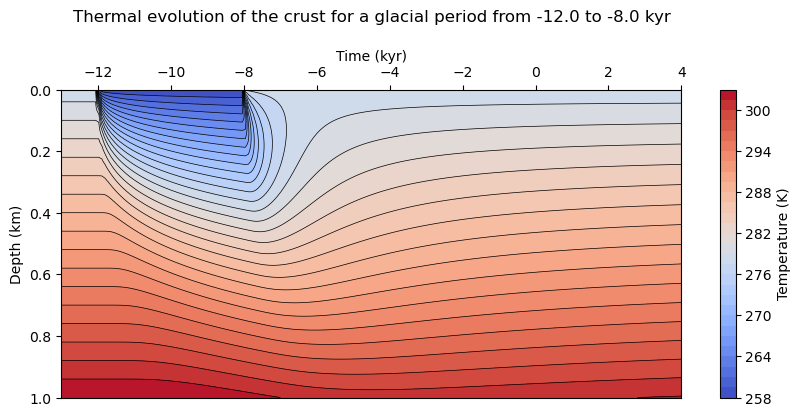

In [1]:
# [Excerpt from] ice_age.m
# Carl Tape, 20-Oct-2010
#
# Translated to Python by Liam Toney, 08-Oct-2020
#
# Turcotte and Schubert, Problem 4-34 (p. 156 of 2nd ed.)

import numpy as np
from scipy import special
import matplotlib.pyplot as plt

M_PER_KM = 1000  # [m/km]

kyr2s = 60 * 60 * 24 * 365.25 * 1000
s2kyr = 1 / kyr2s

# CONSTANTS

# Time points and durations -- ALL IN SECONDS
# We assume that 0 kyr is the present time
Gt1 = -12*kyr2s              # start of glaciation
Gt2 = -8*kyr2s               # finish of glaciation
Gtf = 4*kyr2s                # stopping time for calculations
tau = np.abs(Gt2-Gt1)        # duration of glaciation
tau_post = np.abs(Gtf-Gt2)   # duration of post-glaciation
tau_pre = 0.25*tau           # duration of pre-glaciation
Gt0 = Gt1 - tau_pre          # start time of calculations
tau_tot = np.abs(Gtf - Gt0)  # duration of calculations

# Other constants
dT = 20            # DECREASE in temp during glaciation (K)
kap = 1.0e-6       # thermal diffusivity (m^2/s)
T0 = 278           # surface temp non-glaciation (K)
beta = 25 / 1000   # near-surface thermal gradient (pre-glaciation) (K/m)
depth = 1          # maximum depth (km) for calculations

# Create the depth-time mesh
numt = 200
numy = numt
tmin = -(tau_pre + tau)
tmax = tau_post
ymin = 0
ymax = depth * M_PER_KM
tvec = np.linspace(tmin, tmax, numt)
yvec = np.linspace(ymin, ymax, numy)
tmat, ymat = np.meshgrid(tvec, yvec)
nump = numt * numy

# Shift the time to match "real" time values (for plotting only)
tplot = (tmat + Gt2)*s2kyr
tmin0 = tplot.min()
tmax0 = tplot.max()
tplotvec = tplot[0, :]

# Split matrix of time points into three parts
iT1 = tvec < -tau
iT2 = (tvec > -tau) & (tvec < 0)
iT3 = tvec >= 0
t1 = tmat[:, iT1]
t2 = tmat[:, iT2]
t3 = tmat[:, iT3]
Y1 = ymat[:, iT1]
Y2 = ymat[:, iT2]
Y3 = ymat[:, iT3]

# Construct the solution
T = np.zeros((numy, numt))
T[:, iT1] = T0 + beta * Y1
T[:, iT2] = T0 + beta * Y2 - dT * special.erfc(Y2 / (2 * np.sqrt(kap * (t2 + tau))))
T[:, iT3] = T0 + beta * Y3 - dT * special.erfc(Y3 / (2 * np.sqrt(kap * (t3 + tau)))) \
                           + dT * special.erfc(Y3 / (2 * np.sqrt(kap * t3)))

# Plot
fig, ax = plt.subplots(figsize=(10, 4))

sm = ax.contourf(tplot, ymat / M_PER_KM, T, levels=30, cmap='coolwarm')
ax.contour(tplot, ymat / M_PER_KM, T, levels=30, colors='black', linewidths=0.5)

ax.set_xlabel('Time (kyr)')
ax.set_ylabel('Depth (km)')
ax.set_title(
    f'Thermal evolution of the crust for a glacial period from {Gt1*s2kyr:.1f} to {Gt2*s2kyr:.1f} kyr',
    pad=20,
)
fig.colorbar(sm, label='Temperature (K)')

ax.axis([tmin0, tmax0, ymin / M_PER_KM, ymax / M_PER_KM])
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

plt.show()